# Regression SKLEARN

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [7]:
x = 2*np.random.rand(100,1)
y = 4 + 3*x + np.random.rand(100,1)

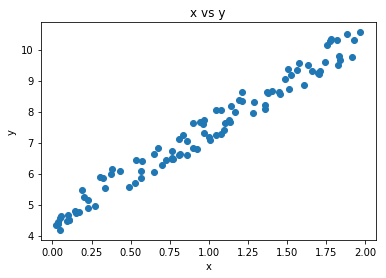

In [8]:
plt.plot(x, y, "o")
plt.xlabel("x")
plt.ylabel("y")
plt.title("x vs y")
plt.show()

In [9]:
x_b= np.c_[np.ones((100,1)), x]

theta_best= np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [10]:
theta_best

array([[4.40170544],
       [3.03145205]])

In [11]:
x_new= np.array([[2],[3]])
x_new_b= np.c_[np.ones((2,1)), x_new]

In [12]:
y_new= x_new_b.dot(theta_best)

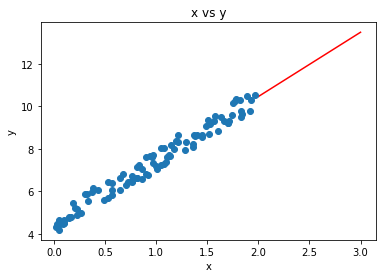

In [13]:
plt.plot(x_new, y_new, "r-")
plt.plot(x, y, "o")
plt.xlabel("x")
plt.ylabel("y")
plt.title("x vs y")
plt.show()

In [14]:
lin_reg= LinearRegression()
lin_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
lin_reg.intercept_, lin_reg.coef_

(array([4.40170544]), array([[3.03145205]]))

In [16]:
lin_reg.predict(np.array([12]).reshape(-1,1))

array([[40.77913007]])

In [20]:
eta= 0.1 #lr
n_epochs= 1000
m=100
t0, t1= 5, 50

In [19]:
theta= np.random.randn(2,1)

In [21]:
def learning_schedule(t):
    return t0/(t+t1)

In [31]:
from sklearn.linear_model import SGDRegressor

sgd_reg1= SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg1.fit(x, y)

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [32]:
sgd_reg2= SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg2.fit(x, y.ravel())

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [33]:
sgd_reg1.intercept_, sgd_reg1.coef_

(array([4.39775424]), array([3.02629593]))

In [34]:
sgd_reg2.intercept_, sgd_reg2.coef_

(array([4.40646784]), array([3.03485996]))

# Polynomial Regression

In [7]:
m= 100
x= 6*np.random.randn(m,1)-3

In [42]:
y= 0.5*x**2 + x + 2 + np.random.randn(m,1)

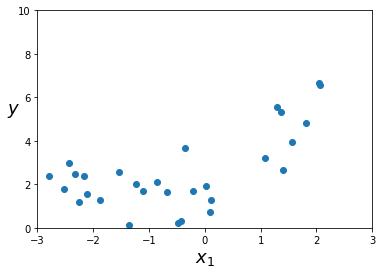

In [43]:
plt.plot(x,y, 'o')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [44]:
from sklearn.preprocessing import PolynomialFeatures

poly_features= PolynomialFeatures(degree=2, include_bias=False)

x_poly= poly_features.fit_transform(x)

In [45]:
lin_reg= LinearRegression()
lin_reg.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
lin_reg.intercept_, lin_reg.coef_

(array([1.97476784]), array([[0.99416125, 0.49835876]]))

In [47]:
x_new= np.linspace(-3,3,100).reshape(100,1)
x_new_poly= poly_features.fit_transform(x_new)
y_pred= lin_reg.predict(x_new_poly)

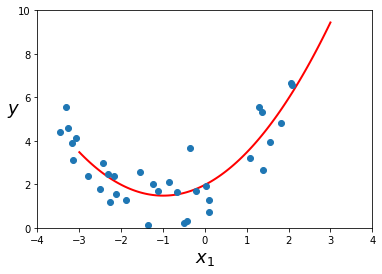

In [60]:
plt.plot(x_new, y_pred, "r-", linewidth=2)
plt.plot(x,y, 'o')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-4, 4, 0, 10])
plt.show()

In [65]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

train_error, test_error=[], []
def plot_curves(model, x, y):
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)
    for m in range(1,len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_pred= model.predict(x_train[:m])
        y_test_pred= model.predict(x_test[:m])
        train_error.append(mean_squared_error(y_train_pred, y_train[:m]))
        test_error.append(mean_squared_error(y_test_pred, y_test[:m]))
    plt.plot(np.sqrt(train_error), label='Train')
    plt.plot(np.sqrt(test_error), label='Test')
    plt.legend()

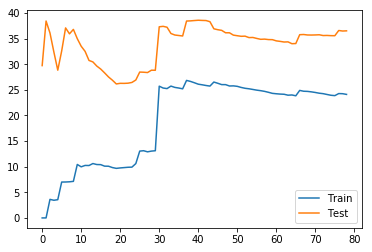

In [66]:
lin_reg=LinearRegression()
plot_curves(lin_reg, x,y)

In [69]:
from sklearn.pipeline import Pipeline

polynomial_regression= Pipeline((
                                ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                                ("sgd_reg", LinearRegression()),
                                ))

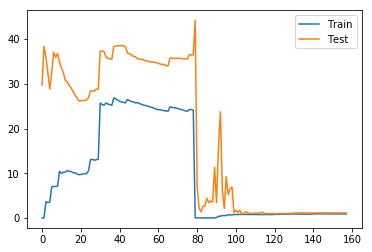

In [70]:
plot_curves(polynomial_regression, x,y)

# Ridge Regression

In [90]:
from sklearn.linear_model import Ridge

ridge_reg= Ridge(alpha=1, solver= "cholesky")
ridge_reg.fit(x,y)

ridge_reg.predict(x[[2]])

array([[24.36262376]])

In [91]:
y[[2]]

array([[18.24136722]])

In [92]:
from sklearn.linear_model import SGDRegressor

sgd_reg= SGDRegressor(penalty="l2")
sgd_reg.fit(x,y)

c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\soumyama\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [97]:
sgd_reg.predict(x[[2]])

array([1.63091814])

# Lasso Regression

In [100]:
from sklearn.linear_model import Lasso

lasso_reg= Lasso(alpha=0.1)
lasso_reg.fit(x,y)

lasso_reg.predict(x[[2]])

array([24.35398351])

# Elastic Net Regression

In [101]:
from sklearn.linear_model import ElasticNet

elastic_net= ElasticNet(alpha=0.1, l1_ratio=0.5)

elastic_net.fit(x,y)

elastic_net.predict(x[[2]])

array([24.35497183])

# Early Stopping

In [113]:
from sklearn.base import clone

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

sgd_reg= SGDRegressor(max_iter=1, warm_start=True, penalty=None,
                     learning_rate="constant", eta0=0.0005)

minimum_test_error= float("inf")
best_epoch=None
best_model=None
for epoch in range(1000):
    sgd_reg.fit(x_train, y_train.ravel())
    y_test_pred= sgd_reg.predict(x_test)
    test_error= mean_squared_error(y_test_pred, y_test)
    if test_error < minimum_test_error:
        minimum_test_error= test_error
        best_epoch=epoch
        best_model= clone(sgd_reg)
print(best_epoch)

377


In [114]:
sgd_reg.predict(x[[2]])

array([23.70672205])

# Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

iris= datasets.load_iris()

In [118]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [179]:
x= iris["data"][:,3:] #petal width

In [180]:
y= (iris["target"]==2).astype(np.int) #Virginica=1, else=0

In [181]:
log_reg=LogisticRegression()
log_reg.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [182]:
log_reg.predict_proba(x[[1]])

array([[0.97581359, 0.02418641]])

In [183]:
x_new= np.linspace(0,3, 3000).reshape(-1,1)
y_prob= log_reg.predict_proba(x_new)

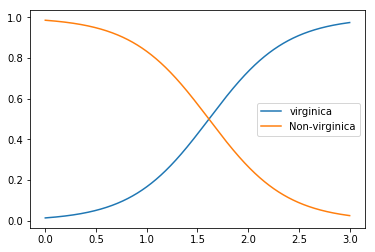

In [184]:
plt.plot(x_new, y_prob[:,1], label="virginica")
plt.plot(x_new, y_prob[:,0], label="Non-virginica")
plt.legend()

# SoftMax/Multinomial Logistic Regression

In [186]:
x= iris["data"][:,(2,3)]
y= iris["target"]

softmax_reg= LogisticRegression(multi_class="multinomial", solver= "lbfgs", C=10)
softmax_reg.fit(x,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [188]:
softmax_reg.predict([[5,2]])

array([2])

In [189]:
softmax_reg.predict_proba([[5,2]])

array([[6.33134078e-07, 5.75276066e-02, 9.42471760e-01]])

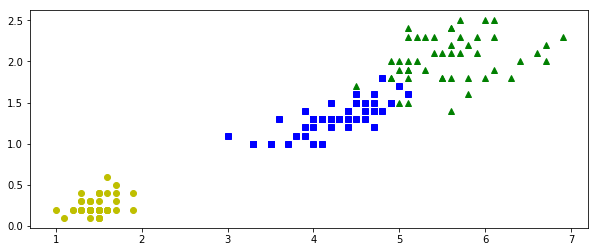

In [191]:
plt.figure(figsize=(10, 4))
plt.plot(x[y==2, 0], x[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(x[y==1, 0], x[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(x[y==0, 0], x[y==0, 1], "yo", label="Iris-Setosa")